# Info 98 Final Project
#### By Calvin Chen, Jusheen Kim, Jamila Hussein

In [28]:
import numpy as np
import pandas as pd
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
sqrt = np.sqrt

In [105]:
# Data extraction and cleaning
cleaning, cleaned = open('processed.hungarian.data.txt').read().split("\n"), Table(['1','2','3','4','5','6','7','8','9','10','11','12','13','14'])
cleaning = cleaning[0:len(cleaning)-1]
for i in range(len(cleaning)):
    cleaned = cleaned.with_row([j for j in cleaning[i].split(',')])
for i in cleaned.columns:
    for j cleaned.column(j):
        try:
            j = int(j)
        except:
            # skip
        
# random_cleaned = cleaned.sample(with_replacement=False)

# random_cleaned
# train_set = random_cleaned.take(np.arange(0, int(random_cleaned.num_rows * 0.8)))
# train_status, train_set = train_set.column('Survival Status'), train_set.drop('Survival Status')

# test_set = random_cleaned.take(np.arange(int(random_cleaned.num_rows * 0.8), random_cleaned.num_rows))
# test_status, test_set = test_set.column('Survival Status'), test_set.drop('Survival Status')

['28' '29' '29' '30' '31' '32' '32' '32' '33' '34' '34' '34' '35' '35'
 '35' '35' '36' '36' '36' '36' '37' '37' '37' '37' '37' '37' '37' '38'
 '38' '38' '39' '39' '39' '39' '39' '39' '39' '39' '39' '39' '40' '40'
 '40' '40' '40' '41' '41' '41' '41' '41' '41' '41' '42' '42' '42' '42'
 '42' '42' '42' '43' '43' '43' '43' '43' '43' '43' '43' '44' '44' '44'
 '44' '45' '45' '45' '45' '45' '45' '45' '46' '46' '46' '46' '46' '46'
 '46' '47' '47' '47' '47' '47' '48' '48' '48' '48' '48' '48' '48' '48'
 '48' '48' '48' '49' '49' '49' '49' '49' '49' '49' '49' '50' '50' '50'
 '50' '50' '50' '50' '51' '51' '51' '51' '51' '51' '51' '52' '52' '52'
 '52' '52' '52' '52' '52' '53' '53' '53' '53' '53' '53' '53' '53' '53'
 '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54' '54'
 '54' '54' '55' '55' '55' '55' '55' '55' '55' '55' '55' '55' '56' '56'
 '56' '56' '56' '57' '57' '57' '58' '58' '58' '58' '59' '59' '59' '59'
 '59' '60' '61' '61' '62' '62' '31' '33' '34' '35' '36' '37' '38' '38'
 '38' 

In [30]:
# Creating the kNN Model
def RMSE(array1, array2):
    return sqrt(sum((array1 - array2) ** 2))

def distances(test_row, train_set):
    distances = make_array()
    for row in train_set.rows:
        distances = np.append(distances, RMSE(make_array(row)[0], test_row))
    return distances

def classify(test_row, train_set, k):
    classes_and_distances = Table().with_columns('Test Status', train_status, 'Distances', distances(test_row, train_set)).sort('Distances')
    return classes_and_distances.take(np.arange(k)).group('Test Status').sort('count', descending=True).column(0).item(0)

def accuracy(test_set, train_set, k):
    classes = make_array()
    for row in test_set.rows:
        classes = np.append(classes, classify(make_array(row)[0], train_set, k))
    comparison = Table().with_columns('Predicted Status', classes, 'Actual Status', test_status)
    return np.count_nonzero(comparison.column(0) == comparison.column(1)) / len(comparison.column(0)) * 100

In [31]:
# Testing
best_k = Table(['k', 'Accuracy'])
for i in range(1, 20): # Only using k-values from 1 to 20
    best_k = best_k.with_row([i, accuracy(test_set, train_set, i)])
best_k.where('Accuracy', are.equal_to(max(best_k.column(1))))

k,Accuracy
9,88.7097


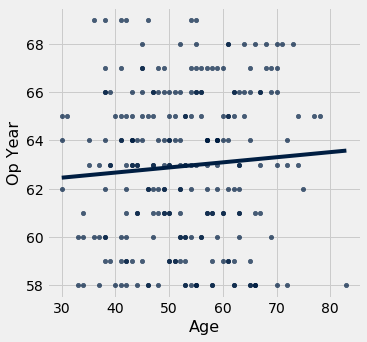

In [92]:
# Creating the linear regression
def standard_units(xyz):
    return (xyz - np.mean(xyz))/np.std(xyz)

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [93]:
# intercept = intercept(train_set, 'Num of Pos Aux Nodes', 'Age')
# slope = slope(train_set, 'Num of Pos Aux Nodes', 'Age')

# testing = train_set.with_column('Guess', slope * train_set.column(2) + intercept)
# residuals = testing.with_column('Residuals', testing.column('Guess') - testing.column(1))



# rows = open('haberman.data.txt').read().split("\n")
# test = Table(['1','2','3','4'])
# test.with_row([int(i) for i in rows[0].split(',')])

# cleaned = cleaned.with_row([int(j) for j in cleaning[0].split(',')])
# type(cleaned.column(0).item(0))
# cleaning[0].split(',')

# adult_data = open('adult.data.txt').read()

# cleaner = []
# for i in range(len(cleaning)):
#     cleaner.append(cleaning[i].split(", "))
# cleaned = Table(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
# for i in range(10000):
#     cleaned = cleaned.with_row(cleaner[i])
# cleaned

# adult_data = open('adult.data.txt').read()
# cleaned_data = adult_data.split('\n')
# splitted = make_array()
# for i in range(1000):
#     chunk = cleaned_data[i].split(', ')
# #     splitted += chunk
#     print(chunk)
#     splitted = np.append(splitted, list(chunk))
#     print(splitted)
# # cleaned_data[0].split(', ')
# # splitted = cleaned_data[0:15]
# # splitted1 = cleaned_data[15:30]
# # splitted, splitted1



# splitted = []

# def split(data):
#     if len(data) <= 15:
#         return data
#     else:
#         one_row = data[0:15]
# #       np.append(splitted, one_row)
#         splitted.append(one_row)
#         return split(data[15:])

# split(short_data)
# # test = Table(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
# # # for row in splitted:
# # #     print(row)
# # test.with_row(make_array(np.arange(16)))
# # test
# table = Table(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
# for i in range(len(splitted)):
#     table.with_row(splitted[i])
# splitted

# # tiles = Table(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
# # tiles.with_row(splitted[0])
# # tiles.with_rows(make_array(make_array('c', 2, 3), make_array('d', 4, 2)))

# # test.with_rows([np.arange(17)])

# # adult_data = pd.read_csv('adult.data.txt')
# # adult_data = open('adult.data.txt')
# # adult_data = open('adult.data.txt').read()
# # cleaned_data = adult_data.split(', ')
# # Table.read_table(cleaned_data)
# # require(adult_data)
# # setDT(adult_data)